# Automated Generation of High Voltage Transistors and 3LFCC topology implementation

## Abstract
Our project focuses on designing and implementing high voltage re-sizable transistors for a DC-DC buck converter demonstrator based on the three-level flying capacitor converter (3LFCC) architecture, a simple but versatile type of flying-capacitor multi-level (FCML) converter, using the Skywater 130nm CMOS technology (SKY130). This notebook shows the main steps of the analog design flow, namely simulation, layout, verification and post-layout simulation of a single converter core, based on the requirements that the user has given as input.


## 1. Introduction

Recent development in miniaturization of satellites have led to the widespread of the CubeSat standard. These applications have serious volume and weight restrictions and could greatly benefit from fully-integrating DC-DC converters, as they tend to be bulky and heavy. Figure 1 shows the different converters stages in the electronic power system of a CubeSat, where versatile topologies like FCML could prove to be convenient. High current density, reversibility and small passive devices are some of the major challenges. 

</br>

<div>
<center><img src="Images/EPS_.png" width="450"/></center>
</div>

</br> 

<center>Figure 1: Typical electronic power system (EPS) architecture of a CubeSat</center>

</br> 


Through this Notebook, it will be shown in simulation that a single converter core based on 3-L architecture can achieve high levels of efficiency at the targeted loads. It is worth noting that this simulation is considering an external passive filter and flying capacitor, but also some inductances for representing the connections to the chip as such. The layout of the core is built using **.tcl** scripts and the simulations are made in **NGSpice**. The simulation results are then processed through **Python** scripts.

### 1.1 About the converter and its implementation

The 3LFCC used is implemented as a buck converter, having 4 important states, depicted in figure **2**. Depending on the desired voltage output at the load, the rate of appearence of this states will change. When the voltage is higher than $\frac{V_{DD}}{2}$, state 3 won't appear and state 0 will appear twice, but when the voltage is lower than $\frac{V_{DD}}{2}$, the opposite will happen. Voltages in between those ranges will vary the duty cycle of the PWM that feed the switches.

</br>

<div>
<center><img src="Images/3LFC_states.png" width="450"/></center>
</div>

</br> 

<center>Figure 2: States for the 3LFCC</center>

</br> 

As the gate has to be charged with enough voltage to conduct, gate drivers were implemented. This gate drivers were dimensioned for the biggest converter that this notebook can produce. The level shifter circuit and layout was made by the team from UCU, Uruguay. An schematic of the level shifter is presented below in **(3)**.

</br>

<div>
<center><img src="Images/levelshift.jpeg" width="450"/></center>
</div>

</br> 

<center>Figure 3: Level Shifter schematic</center>

</br> 



## 2. About the Notebook

### 2.1 The Notebook flow

This Notebook was made in a way that the user could execute every cell part by part, so they could not only get a layout, but a design that compares Pre and Post Layout device characterization and a Pre Layout System performance, giving 3 results assuring the system's behaviour. The Notebook workflow is present in figure **2**.

</br>

<div>
<center><img src="Images/nb_workflow.png" width="450"/></center>
</div>

</br> 

<center>Figure 2: Notebook workflow diagram </center>

</br> 


### 2.2 Design choices and device characterizations

For a design to be made, it was necessary to first choose and characterize the devices on their own. For the transistors, the hybrid waffle layout was the best option. This is because a converter was fabricated and tested in the Open PMIC for the current levels that are desired for the converter using them, assuring that the IC will perform as needed.
Other benefits of using this particular layout is that it can handle higher currents and have better switching resistance for bigger areas, in comparison of using traditional finger layouts.
After choosing the devices, they were characterized by doing Post Layout simulations. By using the testing setup shown in **(3)** (example for a NMOS setup with $V_{GS}=5V$), the switching resistances and drain-source currents were determined for various multiplicities. 
</br>

<div>
<center><img src="Images/R_setup.png" width="450"/></center>
</div>

</br> 

<center>Figure 3: DC simulation setup for measuring current and switching resistance (Variable $V_{DS}$) </center>

</br> 


The resistance and current were measured at the point where the device was starting to saturate ($i.e.$ at the maximum curvature point between linear and saturation regions). This is shown in figure **4**. 

</br> 

</br>

<div>
<center><img src="Images/R_measure.png" width="450"/></center>
</div>

</br> 

<center>Figure 4: Point of measurement for switching resistance $R_{ON}$ and $I_{DS}$ current</center>

</br> 

</br> 


With this data, a curve fit was made to define a relationship between multiplicity and switching resistance, but also between multiplicity and current. This curves were made for both $|V_{GS}|=2.5V$ and $|V_{GS}|=5V$, as both corner cases are present in the converter. The curve fittings for a NMOS device with $|V_{GS}|=5V$ can be seen in figure **5** and **6**.
</br>

<div>
<center><img src="Images/current_curve.png" width="450"/></center>
</div>

</br> 

<center>Figure 5: Current $I_{DS}$ curve fitting for various multiplicities</center>

</br> 

<div>
<center><img src="Images/R_curve.png" width="450"/></center>
</div>

</br> 

<center>Figure 6: Switching Resistance $R_{ON}$ curve fitting for various multiplicities</center>

</br> 

Having the curve fittings, a design can be made in **Python**. The user just may give as input the desired output current, estimated area of use, switching frequency and voltage output. This will output the minimum area given by the multiplicity necessary to manage the current output. Then, it will enlarge the devices to reach near the maximum area limit. This is made by following the flow diagrams in figure **7** and **8**.

</br> 

<div>
<center><img src="Images/first_flow.png" width="450"/></center>
</div>

</br> 

<center>Figure 7: Flow diagram of process to determine the minimum area given by the multiplicity necessary to manage the current output</center>

</br> 

</br> 

<div>
<center><img src="Images/second_flow.png" width="450"/></center>
</div>

</br> 

<center>Figure 8: Flow diagram of process to maximize the converter size according to the maximum area limit</center>

</br> 


After that, the data will be used by the next code blocks to make a layout for the devices and then various simulations that will characterize specifically each device. This includes using the previous setup shown for the switching resistance measurement, but also a setup for characterizing gate capacitance, as seen below in figure **9**. For measuring the gate capacitance, the time constant was determined by identifying the point where the gate voltage $V_G$ reached the $63.2\%$ of the source voltage for then dividing it on the gate resistance, as seen in **(10)**.


</br>

<div>
<center><img src="Images/Cap_setup.png" width="450"/></center>
</div>

</br> 

<center>Figure 9: Transient simulation setup for measuring gate capacitance</center>

</br> 

</br>

<div>
<center><img src="Images/Cap_measure.png" width="450"/></center>
</div>

</br> 

<center>Figure 10: Point of measurement for gate capacitance $C_{gg}$</center>

</br> 


## 3. Design and Simulation

By using **Python**, the notebook will design according to the user inputs a suitable DC-DC buck converter. Then, it will simulate the cells to have a more certain approximation of the real performance. Next, it will proceed to make the layout for the transistors for then simulating an efficiency that gets nearer to the final results. Finally, it will run a transient simulation to characterize the system as a whole and then generate the layout for a converter core.

### 2.2 Converter Design

In [1]:
post_lay_sim_eff= 0
post_lay_dev_eff= 0

import numpy as np

alpha=float(input('Percentage of period for dead time: '))
alpha/=100
v_ref=float(input('Output voltage in V: '))
freq=float(input('Operation frequency in MHz: '))
v_dc=5 #the level shifter is designed for a dc voltage output of 5V and a dc voltage input of 1.8V
dutycycle=round(1 - v_ref/v_dc,3)
period=round(1/freq,2)*1000
iout=float(input('Enter desired current output in mili-amperes (mA): '))

p_mult=0
n_mult=0
p_cell=0
n_cell=0
big=round(iout/1000, 5)
vdd=5
freq*=1_000_000
guard_width=48
guard_offset_x=11.25
size=5.5


def lin_funct(m, a, b):
     return round(a*m + b,5) 

def cap_loss(cap, v, f):
     return round(cap*v*v*f,5) 

def r_mult(m, a, b, c):
    return round(a/m + b*m + c,5)

def mult_r(r, a, b):
    return round(a/r + b/(r**2),5)

def curr_funct(m, a, b, c):
     return round((1-a*np.exp(-b*m)) + c,5) 

def guard_side(n, size, off, w):
     return round((n-1)*size + 2*(off + w) - 5,1)

nmos_a=2.593047752959509
nmos_b=0.0003079211125150696
nmos_c=1.5895443408558942

n=2
flag=True

while n<=36 and flag:
    mult=n*(n-1)*2
    cand=curr_funct(mult, nmos_a, nmos_b, nmos_c)
    if big<=cand:
      flag=False
      n_mult=mult
      n_cell=n
    else:
        n+=2

res_data=np.array([1176.1717825605258, 3.1992633969970516e-05, 0.17103891844966482])
inv_data=np.array([2527.905648043019, 5820.143508748493])



user_area=float(input('Enter max area in square microns (um^2): '))

n=n_cell
flag=True
little=float('inf')
real_pcell=2
solve=True
real_area=0
while n<=36 and flag:
   cand_nmult=n*(n-1)*2
   mos_res=r_mult(cand_nmult, *res_data)
   cand_pmult=mult_r(mos_res, *inv_data)
   cand_pcell=2
   little=float('inf')
   while cand_pcell<=48:
      real_pmult=cand_pcell*(cand_pcell-1)*2
      diff=real_pmult-cand_pmult
      if abs(diff)<=little:
         real_pcell=cand_pcell
         true_pmult=real_pmult
         little=abs(diff)
      cand_pcell+=2
   n_area=2*guard_side(n, size, guard_offset_x, guard_width)**2
   p_area=2*guard_side(real_pcell, size, guard_offset_x, guard_width)**2
   cand_area=n_area+p_area
   if cand_area>user_area:
      flag=False
   else:
      real_area=cand_area
      p_cell=real_pcell
      p_mult=true_pmult
      n_cell=n
      n_mult=cand_nmult
   n+=2

if real_area!=0:
   print('\nThe multiplicity for achieving the desired current and area is',p_mult,'for the PMOS device and', n_mult, 'for the NMOS device.')
   print('This will produce a DC-DC converter with an area of',real_area,'um^2')
else:
   print('\nThe minimum multiplicity for achieving the desired current and area is',true_pmult,'for the PMOS device and', n_mult, 'for the NMOS device.')
   print('This will produce a DC-DC converter with an area of',cand_area,'um^2')
   print('This does not meet the user specs')


Percentage of period for dead time:  2
Output voltage in V:  3.3
Operation frequency in MHz:  1
Enter desired current output in mili-amperes (mA):  50
Enter max area in square microns (um^2):  110000



The multiplicity for achieving the desired current and area is 264 for the PMOS device and 112 for the NMOS device.
This will produce a DC-DC converter with an area of 106760.0 um^2


### 2.3 Pre Layout Device Simulation

The next block will generate **SPICE** files for simulating the switch resistance for both NMOS and PMOS devices. This is a reference previous to the layout, so it does not contemplate layout parasitics.

In [4]:
### SPICE code generation ###


nmos_spice=open('SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice','r')
nmos_data=[]

for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()

nmos_data[13]='.param mul = '+str(n_mult)+'\n'

nmos_spice=open('SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice','w')

for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice','r')
pmos_data=[]

for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()

pmos_data[11]='.param mul = '+str(p_mult)+'\n'

pmos_spice=open('SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice','w')

for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()




nmos_spice=open('SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice','r')
nmos_data=[]

for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()

nmos_data[3]='+ sa=0 sb=0 sd=0 mult='+str(n_mult)+' m='+str(n_mult)+'\n'

nmos_spice=open('SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice','w')

for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice','r')
pmos_data=[]

for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()

pmos_data[10]='+ sa=0 sb=0 sd=0 mult='+str(p_mult)+' m='+str(p_mult)+'\n'

pmos_spice=open('SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice','w')

for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()

The next blocks will run the simulation for the NMOS device

In [2]:
!ngspice SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt nmos_roncalc

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt nmos_roncalc

Circuit: **.subckt nmos_roncalc

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

 Reference value :  2.77300e+00
No. of Data Rows : 30000
Reset re-loads circuit **.subckt nmos_roncalc

Circuit: **.subckt nmos_roncalc

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000

In [3]:
!ngspice SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt prelayout_cap

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt prelayout_cap

Circuit: **.subckt prelayout_cap

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp2                                        2.5
g                                     

This next block will run the simulation for the PMOS device

In [4]:
!ngspice SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt pmos_roncalc

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt pmos_roncalc

Circuit: **.subckt pmos_roncalc

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.0000E-06 

In [5]:
!ngspice SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt prelayout_cap_pmos

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt prelayout_cap_pmos

Circuit: **.subckt prelayout_cap_pmos

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vss                    

This next code block will analyze the data and store it in the output log file so you may see the results.

In [2]:
import pandas as pd
import numpy as np

colors=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
df=pd.read_fwf('SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.txt')
df.to_csv('SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.csv', index=False)
data = pd.read_csv('SPICE_files/NMOS/PRELAYOUT/NMOS_R_on_calc_PRELAYOUT.csv').values


df2=pd.read_fwf('SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.txt')
df2.to_csv('SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.csv', index=False)
data2 = pd.read_csv('SPICE_files/PMOS/PRELAYOUT/PMOS_R_on_calc_PRELAYOUT.csv').values


df3=pd.read_fwf('SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.txt')
df3.to_csv('SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.csv', index=False)
data3= pd.read_csv('SPICE_files/NMOS/PRELAYOUT_CAP/NMOS_cap_calc_PRELAYOUT.csv').values


df4=pd.read_fwf('SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.txt')
df4.to_csv('SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.csv', index=False)
data4= pd.read_csv('SPICE_files/PMOS/PRELAYOUT_CAP/PMOS_cap_calc_PRELAYOUT.csv').values

ind=0
smol=float('inf')
currents=big

VGS=[2.5, 5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_2_5=-data[real_ind,1]
    nmos_volt_2_5=data[real_ind,0]
    nmos_res_2_5=nmos_volt_2_5/nmos_curr_2_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_5=-data[real_ind,1]
    nmos_volt_5=data[real_ind,0]
    nmos_res_5=nmos_volt_5/nmos_curr_5

ind=0
smol=float('inf')
VGS=[-5, -2.5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=data2[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    pmos_curr_5=data2[real_ind,1]
    pmos_volt_5=-data2[real_ind,0]
    pmos_res_5=pmos_volt_5/pmos_curr_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=data2[ind,1]-currents
       if cand<=smol:
          real_ind=ind
          smol=cand
       ind+=1
    pmos_curr_2_5=data2[real_ind,1]
    pmos_volt_2_5=-data2[real_ind,0]
    pmos_res_2_5=pmos_volt_2_5/pmos_curr_2_5

print('PMOS switching resistance for VGS=-2.5V:',pmos_res_2_5,'ohms')    
print('PMOS switching resistance for VGS=-5V:',pmos_res_5,'ohms')   
print('NMOS switching resistance for VGS=2.5V:',nmos_res_2_5,'ohms')   
print('NMOS switching resistance for VGS=5V:',nmos_res_5, 'ohms')   


VGS=[2.5,5]

## If you want to change the current sweep step  in the for more data, you may change this parameter
## here, named current_sweep_step.


row=0
i=0

for volt in VGS:
    for number in data3:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data3[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        nmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=2.5V:',cap,'pF')
    else:
        tau2 = data3[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        nmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=5V:',cap2,'pF')

row=0
i=0        
        
for volt in VGS:
    for number in data4:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data4[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        pmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=2.5V:',cap,'pF')
    else:
        tau2 = data4[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        pmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=5V:',cap2,'pF')

        
s0_rate=round(1-2*dutycycle,3)   
s1_rate=dutycycle-2*alpha
s2_rate=dutycycle-2*alpha
s3_rate=0        
p_dyn_loss = cap_loss(pmos_cap_2_5,vdd,freq) + cap_loss(pmos_cap_5,vdd,freq)
n_dyn_loss = cap_loss(nmos_cap_2_5,vdd,freq) + cap_loss(nmos_cap_5,vdd,freq)

total_dyn_loss = p_dyn_loss + n_dyn_loss        
        
s0_stat_loss=pmos_res_2_5*big**2+pmos_res_5*big**2
s1_stat_loss=nmos_res_2_5*big**2+pmos_res_5*big**2
s2_stat_loss=pmos_res_2_5*big**2+nmos_res_5*big**2
s3_stat_loss=nmos_res_2_5*big**2+nmos_res_5*big**2

s0_volt=5-pmos_res_2_5*big-pmos_res_5*big
s1_volt=5-2.5-nmos_res_2_5*big-pmos_res_5*big
s2_volt=2.5-pmos_res_2_5*big-nmos_res_5*big
s3_volt=nmos_res_2_5*big+nmos_res_5*big

mean_volt=s0_volt*s0_rate+s1_volt*s1_rate+s2_volt*s2_rate+s3_volt*s3_rate
total_stat_loss=s0_stat_loss*s0_rate + s1_stat_loss*s1_rate + s2_stat_loss*s2_rate + s3_stat_loss*s3_rate 

print('Voltage Output',mean_volt,'V')
total_loss=total_stat_loss + total_dyn_loss
power_in=big*(s0_rate+s1_rate)*5

pre_lay_total_stat_loss= total_stat_loss/power_in*100
pre_lay_total_dyn_loss= total_dyn_loss/power_in*100

pre_lay_dev_eff=(1-total_loss/power_in)*100
print('Converter core efficiency with effective res (PRE):',pre_lay_dev_eff,'%')

PMOS switching resistance for VGS=-2.5V: 8.23681445774463 ohms
PMOS switching resistance for VGS=-5V: 4.803883726798277 ohms
NMOS switching resistance for VGS=2.5V: 7.510556351972329 ohms
NMOS switching resistance for VGS=5V: 3.9591858171918095 ohms
NMOS Cgg for VGS=2.5V: 0.6645999999999979 pF
NMOS Cgg for VGS=5V: 0.6911000000000082 pF
PMOS Cgg for VGS=2.5V: 1.459600000000006 pF
PMOS Cgg for VGS=5V: 1.5650999999999868 pF
Voltage Output 2.5236922237417083 V
Converter core efficiency with effective res (PRE): 81.33200721747444 %


### 2.4 Automated Layout and Post Layout Simulation
The next code blocks will generate **.tcl** files for making the layout for both devices and extract parasitics to characterize the switch resistance.

In [7]:
nmos_tcl=open('mag_files/waffles_nmos.tcl','r')
nmos_data=[]

for line in nmos_tcl:
    nmos_data.append(line)
nmos_tcl.close()

nmos_data[12]='set n '+str(n_cell)+'\n'
nmos_data[41]='save mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[42]='load mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-12]='save mag_files/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-21]='load nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'
nmos_data[-22]='flatten nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'

nmos_tcl=open('mag_files/waffles_nmos.tcl','w')

for line in nmos_data:
    nmos_tcl.write(line)
nmos_tcl.close()

pmos_tcl=open('mag_files/waffles_pmos.tcl','r')
pmos_data=[]

for line in pmos_tcl:
    pmos_data.append(line)
pmos_tcl.close()

pmos_data[12]='set n '+str(p_cell)+'\n'
pmos_data[30]='save mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[31]='load mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-12]='save mag_files/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-21]='load pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'
pmos_data[-22]='flatten pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'

pmos_tcl=open('mag_files/waffles_pmos.tcl','w')

for line in pmos_data:
    pmos_tcl.write(line)
pmos_tcl.close()


#### The next block will run the **.tcl** through MAGIC VLSI to make the layout and extract the SPICE netlist for the NMOS device

In [8]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole mag_files/waffles_nmos.tcl


Magic 8.3 revision 376 - Compiled on Thu Mar 16 13:58:47 CET 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "mag_files/waffles_nmos.tcl" from command line.
Cell nmos_waffle_corners has technology "sky130A", but current technology is "minimum"
Loading technology sky130A
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Cell path is now "$CAD_ROOT/magic/sys/current $CAD_ROOT/magic/tutorial /foss/pdks/sky130A/libs.ref/sky130_fd_io/mag /foss/pdks/sky130A/libs.ref/sky130_fd_io/maglef /foss/pdks/sky130A/libs.ref/sky130_sram_macros/mag /foss/pdks/sky130A/libs.ref/sky130_sram_macros/maglef /foss/pdks/sky130A/libs.ref/sky130_fd_pr/mag /foss/pdks/sky130A/libs.ref/sky130_fd_pr/maglef /foss/pdks/sky130A/libs.ref/sky130_ml_xx_hd/mag /foss/pdks/sky130A/libs.ref/sky130_fd_sc_hvl/mag /foss/pdks/sky130

#### The next block will run the **.tcl** through MAGIC VLSI to make the layout and extract the SPICE netlist for the PMOS device

In [9]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole mag_files/waffles_pmos.tcl


Magic 8.3 revision 376 - Compiled on Thu Mar 16 13:58:47 CET 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "mag_files/waffles_pmos.tcl" from command line.
Cell pmos_waffle_corners has technology "sky130A", but current technology is "minimum"
Loading technology sky130A
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Cell path is now "$CAD_ROOT/magic/sys/current $CAD_ROOT/magic/tutorial /foss/pdks/sky130A/libs.ref/sky130_fd_io/mag /foss/pdks/sky130A/libs.ref/sky130_fd_io/maglef /foss/pdks/sky130A/libs.ref/sky130_sram_macros/mag /foss/pdks/sky130A/libs.ref/sky130_sram_macros/maglef /foss/pdks/sky130A/libs.ref/sky130_fd_pr/mag /foss/pdks/sky130A/libs.ref/sky130_fd_pr/maglef /foss/pdks/sky130A/libs.ref/sky130_ml_xx_hd/mag /foss/pdks/sky130A/libs.ref/sky130_fd_sc_hvl/mag /foss/pdks/sky130

#### This code block will make the Post Layout SPICE files for both NMOS and PMOS

In [10]:
nmos_spice=open('mag_files/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()
nmos_data[2]='.subckt nmos_flat_'+str(n_cell)+'x'+str(n_cell)+' G S D DNW VSUBS\n'
nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()
nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT_CAP/nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice','w')
for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()



pmos_spice=open('mag_files/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()
pmos_data[2]='.subckt pmos_flat_'+str(p_cell)+'x'+str(p_cell)+' G S D PW\n'
pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()
pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT_CAP/pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice','w')
for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()

#### The following block will do the SPICE simulation file for both devices

In [11]:
nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice','r')
nmos_sim=[]
for line in nmos_spice:
    nmos_sim.append(line)
nmos_spice.close()

nmos_sim[3]='.include nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice\n'
nmos_sim[5]='XU1 G S D DNW VSUBS nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'

nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice','w')

for line in nmos_sim:
    nmos_spice.write(line)
nmos_spice.close()


pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice','r')
pmos_sim=[]
for line in pmos_spice:
    pmos_sim.append(line)
pmos_spice.close()


pmos_sim[3]='.include pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice\n'
pmos_sim[5]='XU1 G S D PW pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'

pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice','w')

for line in pmos_sim:
    pmos_spice.write(line)
pmos_spice.close()


nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice','r')
nmos_data=[]
for line in nmos_spice:
    nmos_data.append(line)
nmos_spice.close()

nmos_data[1]='.include nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'.spice\n'
nmos_data[2]='XU1 G VSS VP2 DNW VSUBS nmos_flat_'+str(n_cell)+'x'+str(n_cell)+'\n'

nmos_spice=open('SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice','w')

for line in nmos_data:
    nmos_spice.write(line)
nmos_spice.close()

pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice','r')
pmos_data=[]
for line in pmos_spice:
    pmos_data.append(line)
pmos_spice.close()

pmos_data[1]='.include pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'.spice\n'
pmos_data[10]='XU1 G VP2 VSS PW pmos_flat_'+str(p_cell)+'x'+str(p_cell)+'\n'

pmos_spice=open('SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice','w')

for line in pmos_data:
    pmos_spice.write(line)
pmos_spice.close()

#### This cell below will run the Post Layout simulation for the NMOS device

In [12]:
!ngspice SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: * ngspice file - technology: sky130a

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit * ngspice file - technology: sky130a

Circuit: * ngspice file - technology: sky130a

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000



Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One succ

In [13]:
!ngspice SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt postlayout_cap

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt postlayout_cap

Circuit: **.subckt postlayout_cap

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One successful gmin step
Trying gmin =   1.00

#### This cell below will run the Post Layout Simulation for the PMOS device

In [14]:
!ngspice SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: * ngspice file - technology: sky130a

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit * ngspice file - technology: sky130a

Circuit: * ngspice file - technology: sky130a

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000

Note: Starting dynamic gmin stepping
Trying gmin =   1.0000E-03 Note: One successful gmin step
Trying gmin =   1.0000E-04 Note: One successful gmin step
Trying gmin =   1.0000E-05 Note: One succes

In [3]:
!ngspice SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: **.subckt postlayout_cap_pmos

option SCALE: Scale is set to 1e-06 for instance and model parameters
Reset re-loads circuit **.subckt postlayout_cap_pmos

Circuit: **.subckt postlayout_cap_pmos

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 70.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vp                                           0
vss                 

In [4]:
import pandas as pd
import numpy as np

colors=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
df=pd.read_fwf('SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.txt')
df.to_csv('SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.csv', index=False)
data = pd.read_csv('SPICE_files/NMOS/POSTLAYOUT/NMOS_R_on_calc_POSTLAYOUT.csv').values


df2=pd.read_fwf('SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.txt')
df2.to_csv('SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.csv', index=False)
data2 = pd.read_csv('SPICE_files/PMOS/POSTLAYOUT/PMOS_R_on_calc_POSTLAYOUT.csv').values

df3=pd.read_fwf('SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.txt')
df3.to_csv('SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.csv', index=False)
data3= pd.read_csv('SPICE_files/NMOS/POSTLAYOUT_CAP/NMOS_cap_calc_POSTLAYOUT.csv').values


df4=pd.read_fwf('SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.txt')
df4.to_csv('SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.csv', index=False)
data4= pd.read_csv('SPICE_files/PMOS/POSTLAYOUT_CAP/PMOS_cap_calc_POSTLAYOUT.csv').values


ind=0
smol=float('inf')
currents=big

VGS=[2.5, 5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_2_5=-data[real_ind,1]
    nmos_volt_2_5=data[real_ind,0]
    nmos_res_2_5=nmos_volt_2_5/nmos_curr_2_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=-data[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    nmos_curr_5=-data[real_ind,1]
    nmos_volt_5=data[real_ind,0]
    nmos_res_5=nmos_volt_5/nmos_curr_5

ind=0
smol=float('inf')
VGS=[-5, -2.5]
for volt in VGS:
  if volt==VGS[0]:
    while ind<29999:
       cand=data2[ind,1]-currents
       if abs(cand)<=smol:
          real_ind=ind
          smol=abs(cand)
       ind+=1
    pmos_curr_5=data2[real_ind,1]
    pmos_volt_5=-data2[real_ind,0]
    pmos_res_5=pmos_volt_5/pmos_curr_5
  elif volt==VGS[1]:
    smol=float('inf')
    while ind<59999:
       cand=data2[ind,1]-currents
       if cand<=smol:
          real_ind=ind
          smol=cand
       ind+=1
    pmos_curr_2_5=data2[real_ind,1]
    pmos_volt_2_5=-data2[real_ind,0]
    pmos_res_2_5=pmos_volt_2_5/pmos_curr_2_5

print('PMOS switching resistance for VGS=-2.5V:',pmos_res_2_5,'ohms')    
print('PMOS switching resistance for VGS=-5V:',pmos_res_5,'ohms')   
print('NMOS switching resistance for VGS=2.5V:',nmos_res_2_5,'ohms')   
print('NMOS switching resistance for VGS=5V:',nmos_res_5, 'ohms')   


row=0
i=0

for volt in VGS:
    for number in data3:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data3[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        nmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=2.5V:',cap,'pF')
    else:
        tau2 = data3[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        nmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('NMOS Cgg for VGS=5V:',cap2,'pF')

row=0
i=0        
        
for volt in VGS:
    for number in data4:
        if volt==VGS[0] and round(number[1],2)==1.58:
            row=i
            i=0
            break
        elif volt==VGS[1] and round(number[1],2)==3.16:
            row=i
            break
        i+=1
    if volt==VGS[0]:
        tau = data4[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        pmos_cap_2_5 = tau/100
        cap = tau/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=-2.5V:',cap,'pF')
    else:
        tau2 = data4[row,0]-(20*10**(-9)) #minus 20ns of delay for the source
        pmos_cap_5 = tau2/100
        cap2 = tau2/100*1000000000000 #conversion to picofarads
        print('PMOS Cgg for VGS=-5V:',cap2,'pF')

p_dyn_loss = cap_loss(pmos_cap_2_5,vdd,freq) + cap_loss(pmos_cap_5,vdd,freq)
n_dyn_loss = cap_loss(nmos_cap_2_5,vdd,freq) + cap_loss(nmos_cap_5,vdd,freq)

total_dyn_loss = p_dyn_loss + n_dyn_loss        

    
s0_stat_loss=pmos_res_2_5*big**2+pmos_res_5*big**2
s1_stat_loss=nmos_res_2_5*big**2+pmos_res_5*big**2
s2_stat_loss=pmos_res_2_5*big**2+nmos_res_5*big**2
s3_stat_loss=nmos_res_2_5*big**2+nmos_res_5*big**2

s0_volt=5-pmos_res_2_5*big-pmos_res_5*big
s1_volt=5-2.5-nmos_res_2_5*big-pmos_res_5*big
s2_volt=2.5-pmos_res_2_5*big-nmos_res_5*big
s3_volt=nmos_res_2_5*big+nmos_res_5*big

mean_volt=s0_volt*s0_rate+s1_volt*s1_rate+s2_volt*s2_rate+s3_volt*s3_rate
total_stat_loss=s0_stat_loss*s0_rate + s1_stat_loss*s1_rate + s2_stat_loss*s2_rate + s3_stat_loss*s3_rate 
print(mean_volt)
total_loss=total_stat_loss+total_dyn_loss
power_in=big*(s0_rate+s1_rate)*5
post_lay_total_stat_loss= total_stat_loss/power_in*100
post_lay_total_dyn_loss= total_dyn_loss/power_in*100
post_lay_dev_eff=(1-total_loss/power_in)*100
print('Converter core efficiency with effective res (POST):',post_lay_dev_eff,'%')

PMOS switching resistance for VGS=-2.5V: 36.46823612197237 ohms
PMOS switching resistance for VGS=-5V: 20.524285709979193 ohms
NMOS switching resistance for VGS=2.5V: 28.546261757795804 ohms
NMOS switching resistance for VGS=5V: 17.72632971521084 ohms
NMOS Cgg for VGS=2.5V: 0.3975999999999863 pF
NMOS Cgg for VGS=5V: 0.40359999999997986 pF
PMOS Cgg for VGS=-2.5V: 0.8450999999999974 pF
PMOS Cgg for VGS=-5V: 0.8695999999999987 pF
3.0507828590222883
Converter core efficiency with effective res (POST): 96.4768664200738 %


In [ ]:
from tabulate import tabulate
data = [["Pre-Layout (Device Estimation)", pre_lay_dev_eff, pre_lay_total_stat_loss, pre_lay_total_dyn_loss], 
        ["Post-Layout (Device Estimation)", post_lay_dev_eff, post_lay_total_stat_loss, post_lay_total_dyn_loss]]
  
#define header names
col_names = ["", "Efficiency (%)", "Conduction Losses (%)", "Gate Charge Losses (%)"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

### 2.5 Core simulation

In [6]:
t_on=dutycycle*period #s1 t_on
t_on2=t_on#s2 t_on
t_on4=t_on-2*alpha*period #s4 t_on
t_on3=t_on2-2*alpha*period #s3 t_on

delay='0n' #s1 no delay
delay2=str(period/2)+'n' #s2 delay, phase-shifted
delay3=str(period/2+alpha*period)+'n'#s3 delay, phase-shifted with deadtime
delay4=str(alpha*period)+'n' #s4 delay for dead-time

# pulse format: PULSE(v1 v2 delay rise fall t_on period) 

pulse1='V1 D1 VSS PULSE(0 5 '+delay+' 1n 1n '+str(t_on)+'n'+' '+str(period)+'n)\n'
pulse2='V5 D2 VSS PULSE(0 5 '+delay2+' 1n 1n '+str(t_on2)+'n'+' '+str(period)+'n)\n'
pulse3='V6 D3 VSS PULSE(0 5 '+delay3+' 1n 1n '+str(t_on3)+'n'+' '+str(period)+'n)\n'
pulse4='V7 D4 VSS PULSE(0 5 '+delay4+' 1n 1n '+str(t_on4)+'n'+' '+str(period)+'n)\n'



spice_file=open('SPICE_files/core/core_sim.spice','r')
data=[]
for line in spice_file:
    data.append(line)
spice_file.close()

data[6]='I0 VOUT_CORE VSS '+str(round(big, 3))+'\n'
data[10]=pulse3
data[12]=pulse2
data[14]=pulse4
data[16]=pulse1
data[25]='.param muln = '+str(n_mult)+'\n'
data[26]='.param mulp = '+str(p_mult)+'\n'

spice_file=open('SPICE_files/core/core_sim.spice','w')
for line in data:
    spice_file.write(line)
spice_file.close()


In [7]:
!ngspice SPICE_files/core/core_sim.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: 

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vss                                          0
vh                                           5
vout_core                                    3
v_cftop                                    2.5
xc

Output voltage: 3.1969704443704083 V
Input current: 0.000690450306418139 A
Efficiency 92.60537404800027


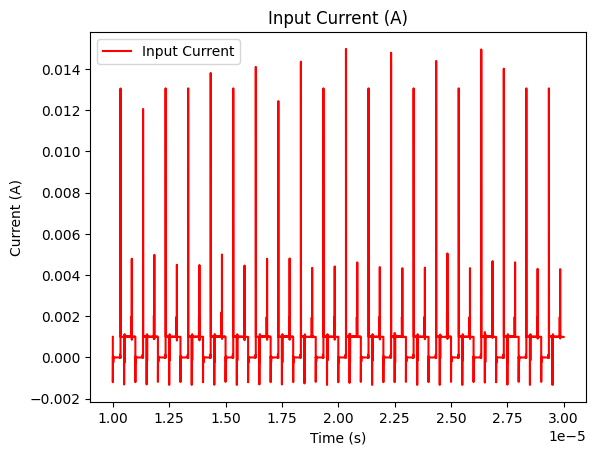

In [8]:
#https://stackoverflow.com/questions/46614526/how-to-import-a-csv-file-into-a-data-array
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import find_peaks

df=pd.read_fwf('SPICE_files/core/core_nofilter_constantload.txt')
df.to_csv('SPICE_files/core/core_nofilter_constantload.csv', index=False)
data = pd.read_csv('SPICE_files/core/core_nofilter_constantload.csv').values


i=0
for number in data:
    if round(number[0],13)==0.00001:
        row1=i
    if round(number[0],13)==0.00003:
        row2=i
        i+=1
        break
    i+=1

y_out = data[row1:row2,1]
y_in = (-1)*data[row1:row2,3]
vout = np.mean(y_out)
iin = np.mean(y_in)
print('Output voltage:',vout,'V')
print('Input current:',iin,'A')
iout = round(big, 3)
pout = vout*iout
vin=5
pin = vin*iin
pre_layout_sim_eff = (pout/pin)*(100)
print('Efficiency',pre_layout_sim_eff)

plt.plot(data[row1:row2,0],y_in,color='r',label='Input Current')
plt.ylabel('Current (A)')
plt.xlabel('Time (s)')
plt.title('Input Current (A)')
plt.legend()
plt.show()



# Converter Layout

#### The following command line will build the **.tcl** file to make the converter layout

In [7]:
tcl_file=open('mag_files/power_stage.tcl','r')
data=[]
for line in tcl_file:
    data.append(line)

tcl_file.close()

data[29]='set n_nmos '+str(n_cell)+'\n'
data[30]='set n_pmos '+str(p_cell)+'\n'
data[34]='getcell mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
data[44]='getcell mag_files/nmos_waffle_'+str(n_cell)+'x'+str(n_cell)+'\n'
data[55]='getcell mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'
data[67]='getcell mag_files/pmos_waffle_'+str(p_cell)+'x'+str(p_cell)+'\n'

tcl_file=open('mag_files/power_stage.tcl','w')

for line in data:
    tcl_file.write(line)

tcl_file.close()

In [8]:
!PDKPATH="${PDK_ROOT}/sky130A" magic -dnull -noconsole mag_files/power_stage.tcl


Magic 8.3 revision 376 - Compiled on Thu Mar 16 13:58:47 CET 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Loading "mag_files/power_stage.tcl" from command line.
"drc(full)" is not one of the DRC styles Magic knows.
The current style is "default".
The DRC styles are: default.
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  10.000 x 10.000  ( 0.000,  0.000), ( 10.000,  10.000)  100.000   
lambda:     1000 x 1000    (     0,  0    ), (  1000,  1000 )  1000000   
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:  19.620 x 3.000   ( 30.000,  57.000), ( 49.620,  60.000)  58.860    
lambda:     1962 x 300     (  3000,  5700 ), (  4962,  6000 

#### The following code block will build the SPICE Post Layout simulation for the converter

In [9]:

t_on=dutycycle*period #s1 t_on
t_on2=t_on#s2 t_on
t_on4=t_on-2*alpha*period #s4 t_on
t_on3=t_on2-2*alpha*period #s3 t_on

delay='0n' #s1 no delay
delay2=str(period/2)+'n' #s2 delay, phase-shifted
delay3=str(period/2+alpha*period)+'n'#s3 delay, phase-shifted with deadtime
delay4=str(alpha*period)+'n' #s4 delay for dead-time

# pulse format: PULSE(v1 v2 delay rise fall t_on period) 

pulse1='V1 D1 VSS PULSE(0 5 '+delay+' 1n 1n '+str(t_on)+'n'+' '+str(period)+'n)\n'
pulse2='V5 D2 VSS PULSE(0 5 '+delay2+' 1n 1n '+str(t_on2)+'n'+' '+str(period)+'n)\n'
pulse3='V6 D3 VSS PULSE(0 5 '+delay3+' 1n 1n '+str(t_on3)+'n'+' '+str(period)+'n)\n'
pulse4='V7 D4 VSS PULSE(0 5 '+delay4+' 1n 1n '+str(t_on4)+'n'+' '+str(period)+'n)\n'

spice_file=open('SPICE_files/core/core_sim_post.spice','r')
data=[]
for line in spice_file:
    data.append(line)

spice_file.close()

data[9]='I0 VOUT_CORE VSS '+str(round(big, 3))+'\n'
data[13]=pulse3
data[15]=pulse2
data[17]=pulse4
data[19]=pulse1

spice_file=open('SPICE_files/core/core_sim_post.spice','w')

for line in data:
    spice_file.write(line)

spice_file.close()

In [60]:
!ngspice SPICE_files/core/core_sim_post.spice -a

******
** ngspice-39 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2022, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Thu Mar 16 12:52:58 UTC 2023
******

Note: Compatibility modes selected: hs a



Circuit: 

option SCALE: Scale is set to 1e-06 for instance and model parameters
option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vss                                          0
vh                                           5
vout_core                                    3
v_cftop                                    2.5
xc

Peak length: 56
Output voltage: 3.3160476921866158 V
Input current: 0.28317539933159946 A
0.15
Efficiency 35.13067554611456


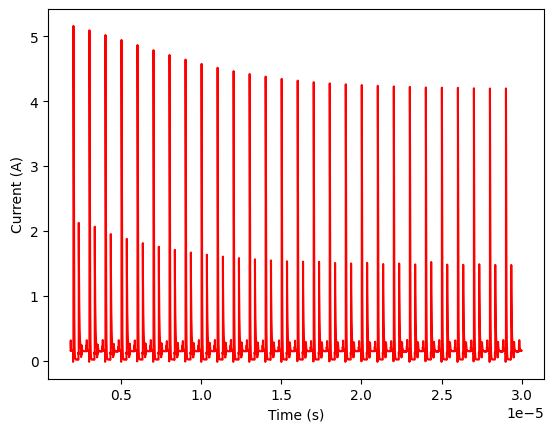

In [3]:
#https://stackoverflow.com/questions/46614526/how-to-import-a-csv-file-into-a-data-array
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import find_peaks

df=pd.read_fwf('core_nofilter_constantload_POST.txt')
df.to_csv('core_nofilter_constantload_POST.csv', index=False)
data = pd.read_csv('core_nofilter_constantload_POST.csv').values



i_cut = 2000
i=0
pk_init = 10

#ls_current=[] max 5, mean 5, max 1.8, mean 1.8


flag=True
for number in data:
    if flag:
        row1=i+i_cut
        flag=False
    if round(number[0],13)==0.00003:
        row2=i
        i+=1
        break
    i+=1

y_out = data[row1:row2,1]
y_in = (-1)*data[row1:row2,3]
peaks , _ = find_peaks(y_in, height=0.7)
pk_len = len(peaks)
print('Peak length:',pk_len)
vout = np.mean(y_out[peaks[pk_init]:peaks[pk_len-1]])
iin = np.mean(y_in[peaks[pk_init]:peaks[pk_len-1]])
print('Output voltage:',vout,'V')
print('Input current:',iin,'A')
iout = round(big, 3)
pout = vout*iout
vin=5
pin = vin*iin
post_lay_sim_eff = (pout/pin)*(100)
print('Efficiency',post_lay_sim_eff)

plt.plot(data[row1:row2,0],y_in,color='r',label='In Current 5V')
plt.ylabel('Current (A)')
plt.xlabel('Time (s)')
plt.show()

In [10]:
from tabulate import tabulate
data = [["Pre-Layout (Device Estimation)", pre_lay_dev_eff, pre_lay_total_stat_loss, pre_lay_total_dyn_loss], 
        ["Post-Layout (Device Estimation)", post_lay_dev_eff, post_lay_total_stat_loss, post_lay_total_dyn_loss], 
        ["Pre-Layout", pre_layout_sim_eff, "-", "-"]]
  
#define header names
col_names = ["", "Efficiency (%)", "Conduction Losses (%)", "Gate Charge Losses (%)"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════════════╤══════════════════╤═════════════════════════╤══════════════════════════╕
│                                 │   Efficiency (%) │ Conduction Losses (%)   │ Gate Charge Losses (%)   │
╞═════════════════════════════════╪══════════════════╪═════════════════════════╪══════════════════════════╡
│ Pre-Layout (Device Estimation)  │          97.7814 │ 1.5734392229200898      │ 0.6451612903225806       │
├─────────────────────────────────┼──────────────────┼─────────────────────────┼──────────────────────────┤
│ Post-Layout (Device Estimation) │          96.4769 │ 1.5876497089584503      │ 1.935483870967742        │
├─────────────────────────────────┼──────────────────┼─────────────────────────┼──────────────────────────┤
│ Pre-Layout                      │          92.6054 │ -                       │ -                        │
├─────────────────────────────────┼──────────────────┼─────────────────────────┼──────────────────────────┤
│ Post-Layout               